In [1]:
import matplotlib.pyplot as plt
import numpy as np

(2, 4, 100)


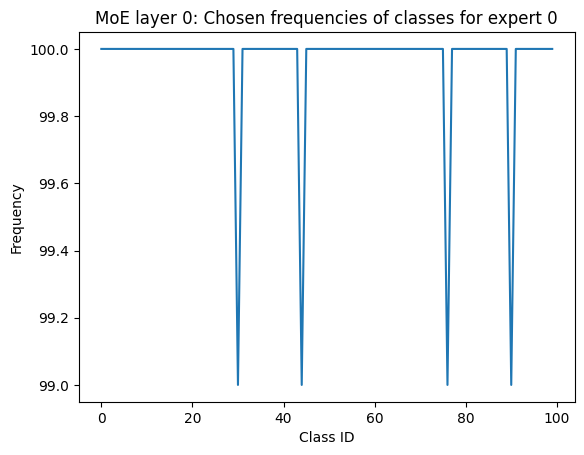

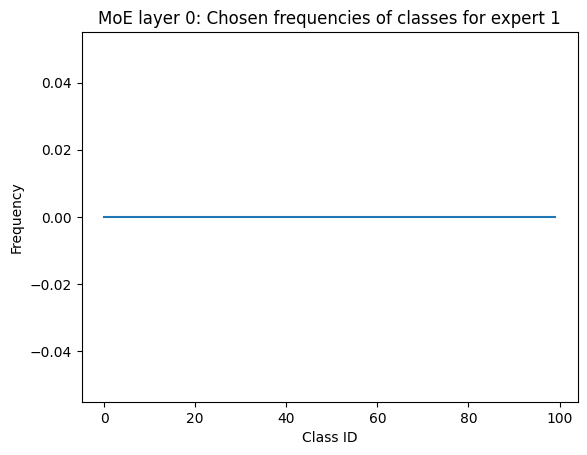

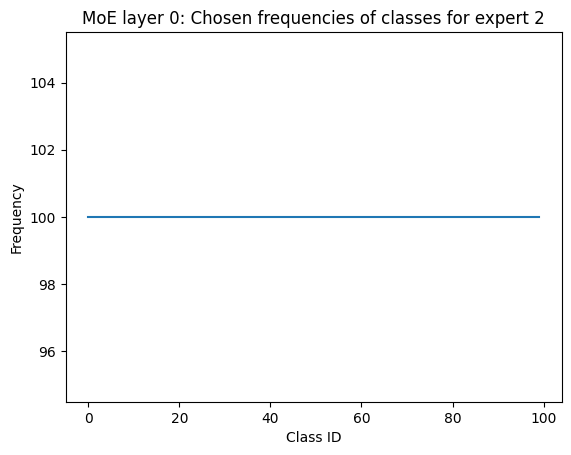

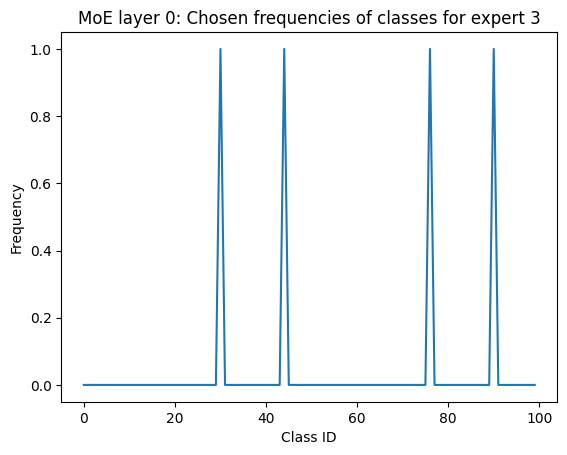

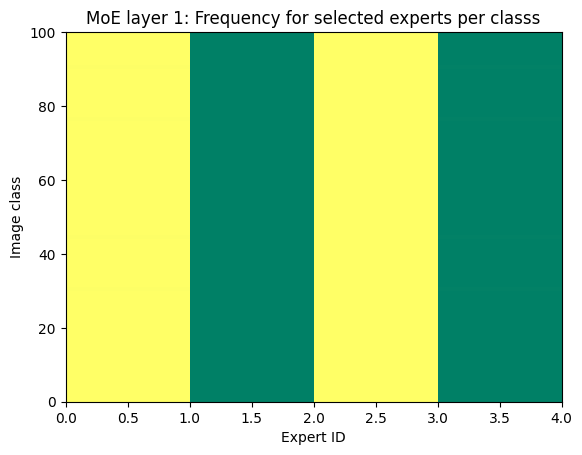

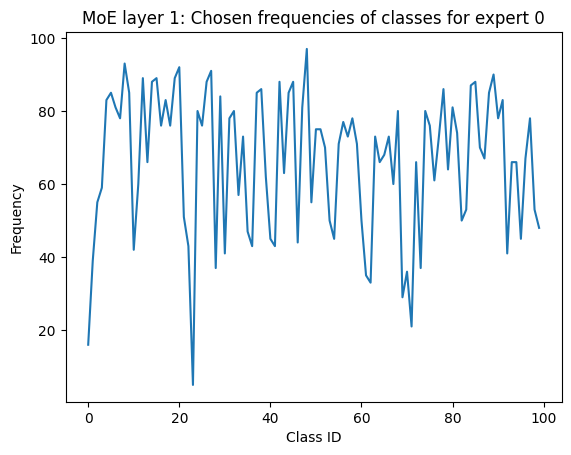

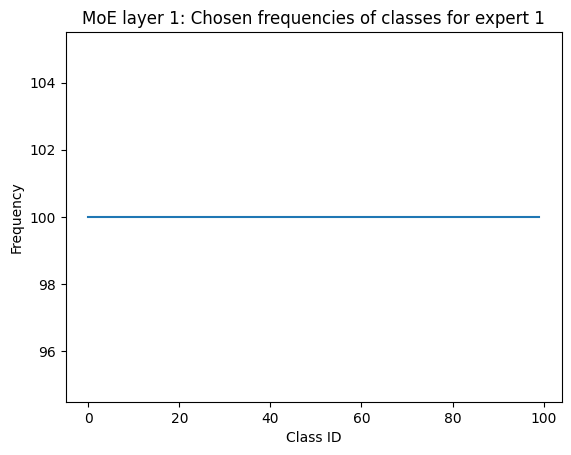

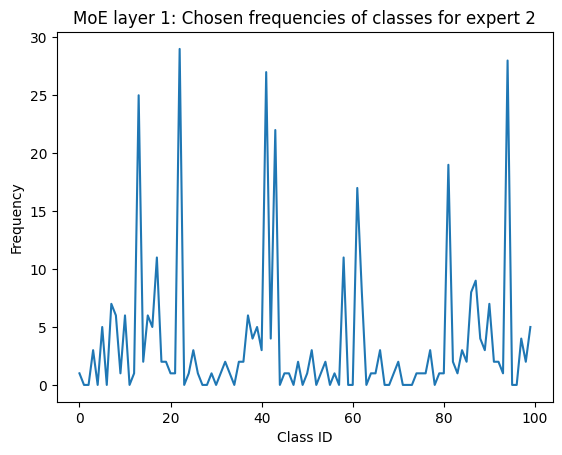

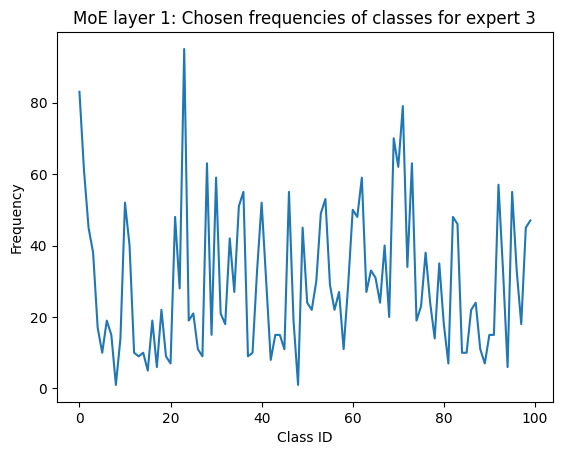

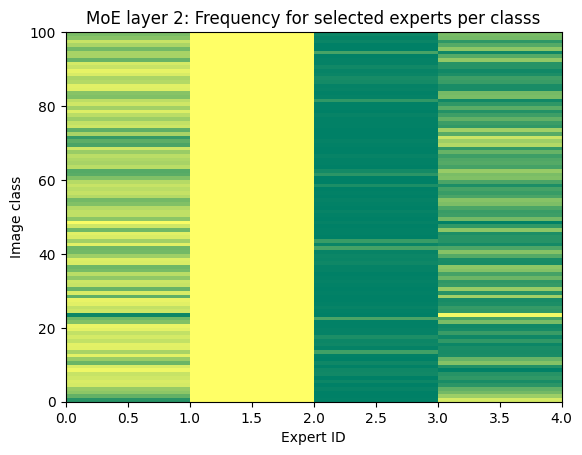

In [2]:
# No. 2
all_freq_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet32MoE/0917_093106/all_freq_from_experts_to_classes_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, freq_from_experts_to_classes in enumerate(all_freq_from_experts_to_classes):
    num_expert = freq_from_experts_to_classes.shape[0]
    classes_id = np.arange(100)
    for expert_id, freq_from_expert_to_classes in enumerate(freq_from_experts_to_classes):
        description = f'MoE layer {idx}: Chosen frequencies of classes for expert {expert_id}'
        plt.plot(classes_id, freq_from_expert_to_classes)
        plt.xlabel('Class ID')
        plt.ylabel('Frequency')
        plt.title(description)
        plt.show()
    description = f'MoE layer {idx+1}: Frequency for selected experts per classs'
    plt.pcolormesh(freq_from_experts_to_classes.T, cmap='summer')
    plt.xlabel('Expert ID')
    plt.ylabel('Image class')
    plt.title(description)
    plt.show()

(2, 4, 100)


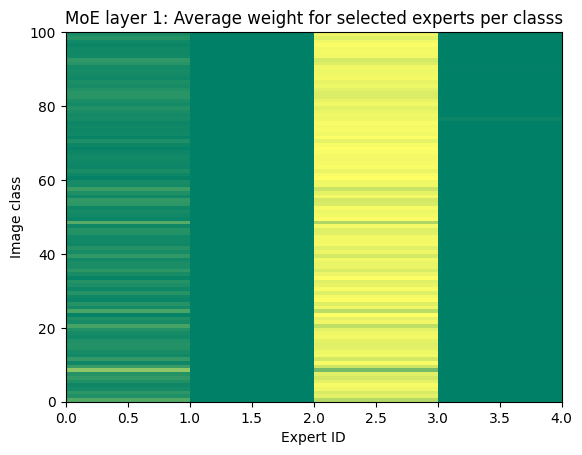

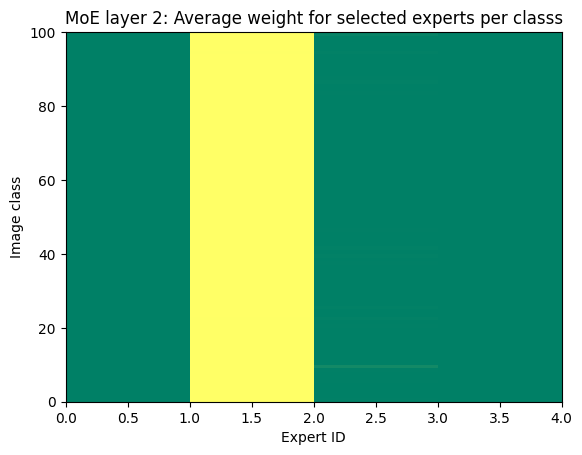

In [3]:
all_avg_weight_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet32MoE/0917_093106/all_avg_weight_from_experts_to_classes_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, avg_weight_from_experts_to_classes in enumerate(all_avg_weight_from_experts_to_classes):
    num_expert = avg_weight_from_experts_to_classes.shape[0]
    num_classes = avg_weight_from_experts_to_classes.shape[1]
    expert_id_list = np.zeros(num_expert * num_classes)
    description = f'MoE layer {idx+1}: Average weight for selected experts per classs'
    plt.pcolormesh(avg_weight_from_experts_to_classes.T, cmap='summer')
    plt.xlabel('Expert ID')
    plt.ylabel('Image class')
    plt.title(description)
    plt.show()

(2, 8, 100)


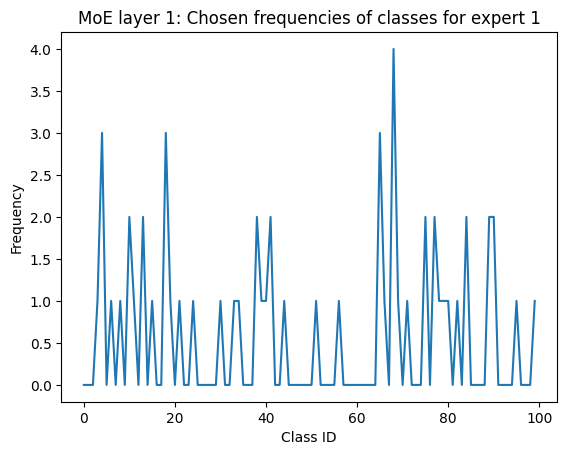

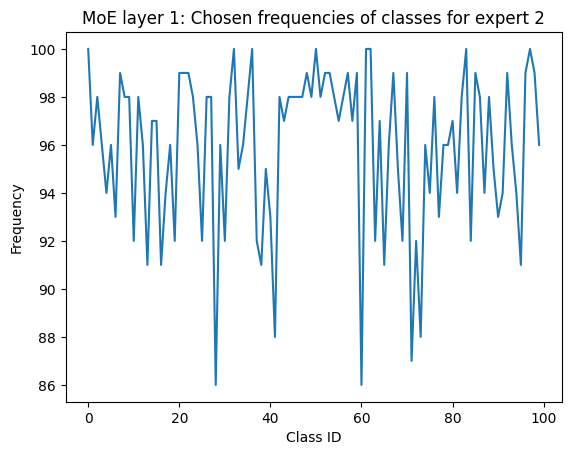

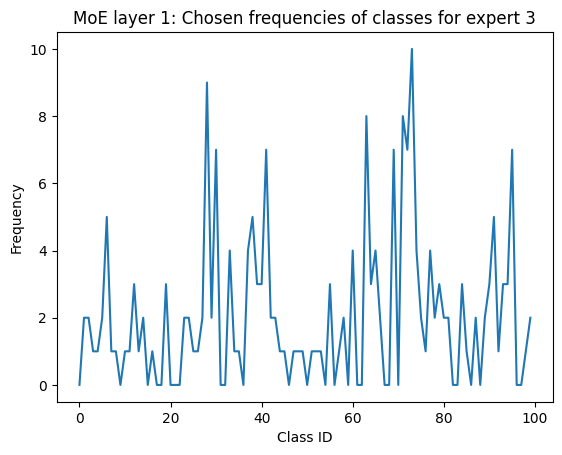

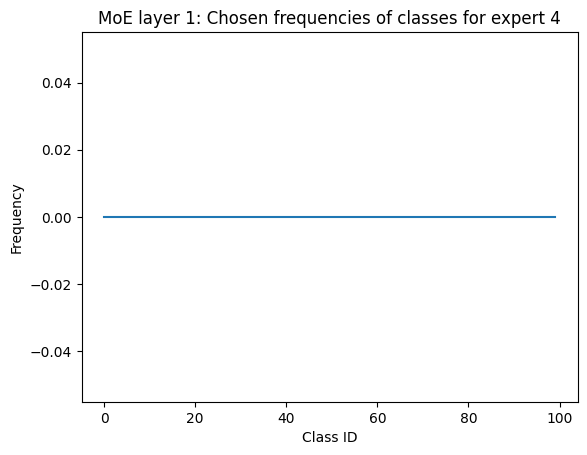

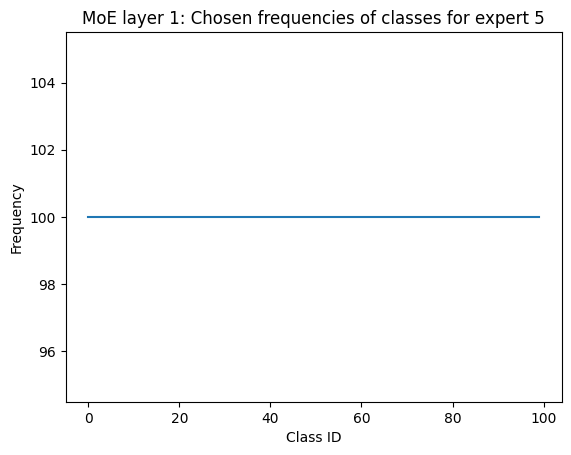

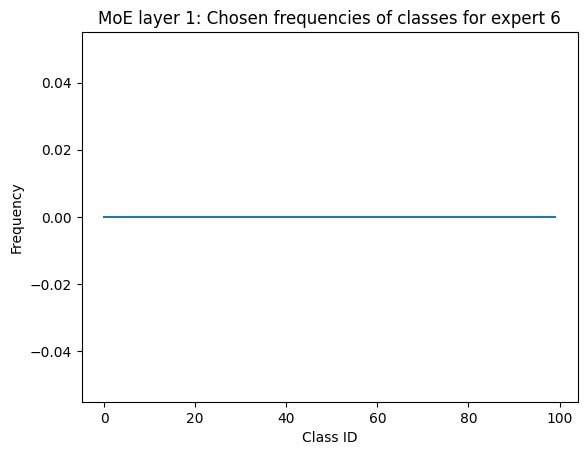

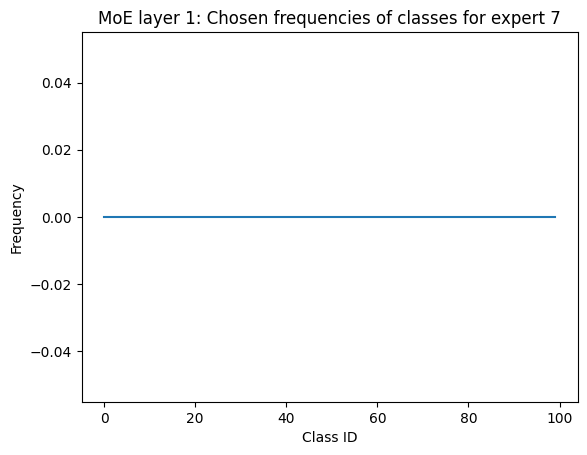

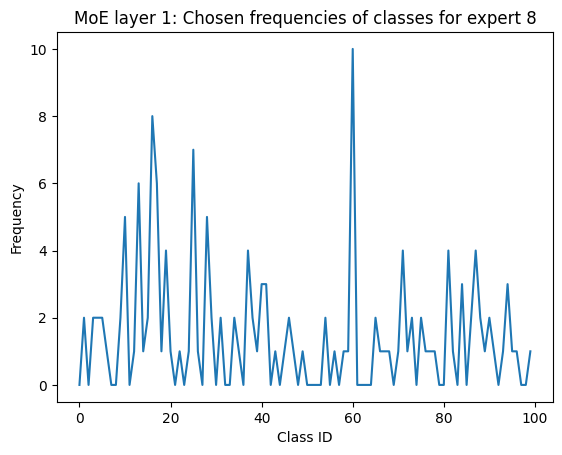

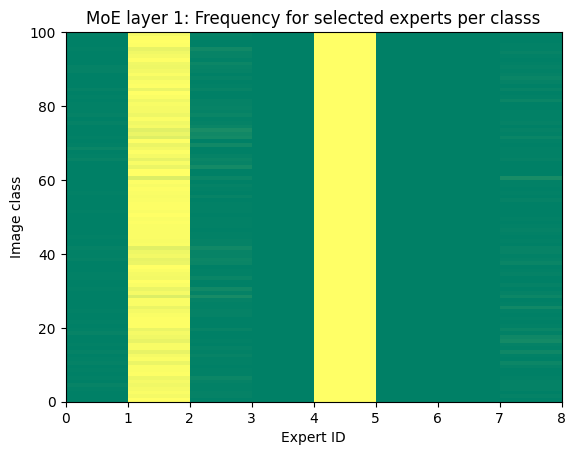

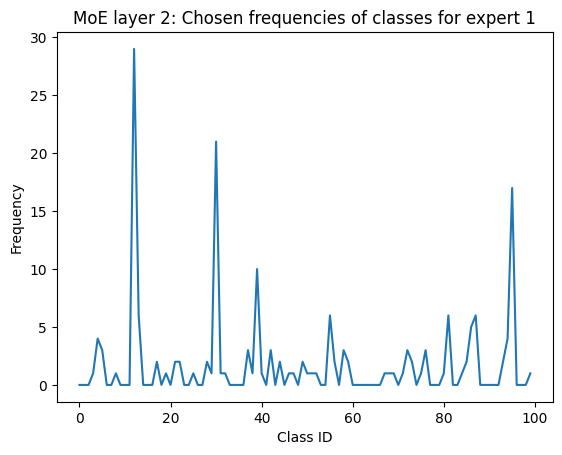

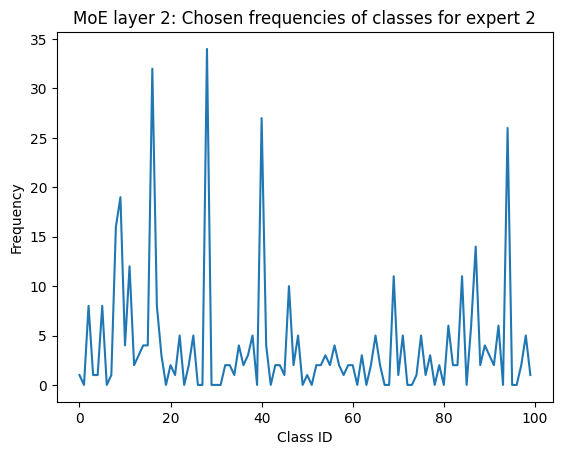

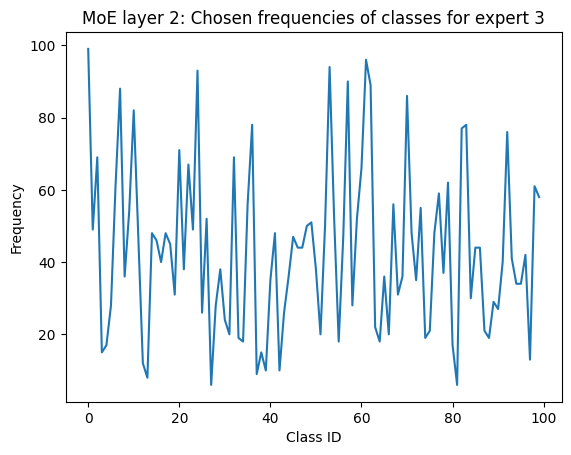

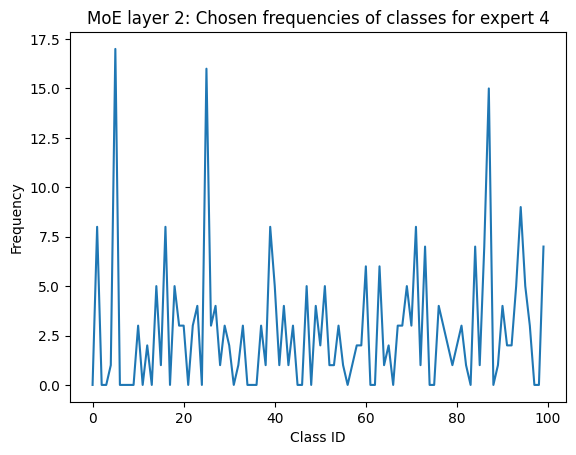

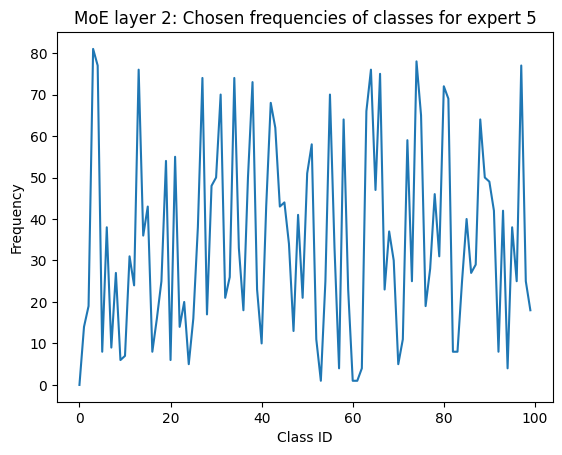

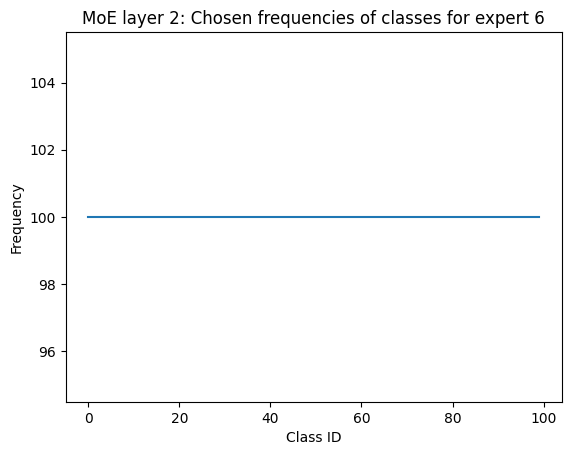

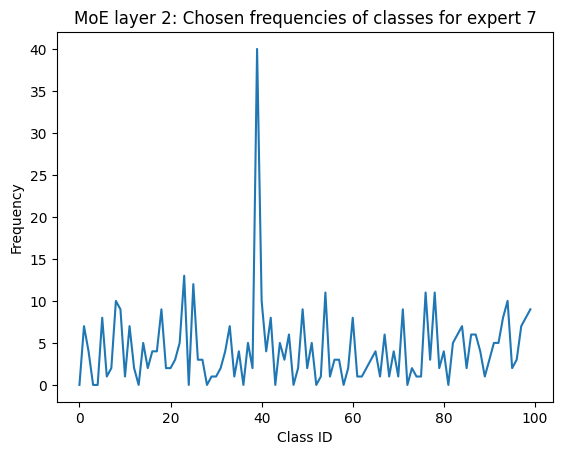

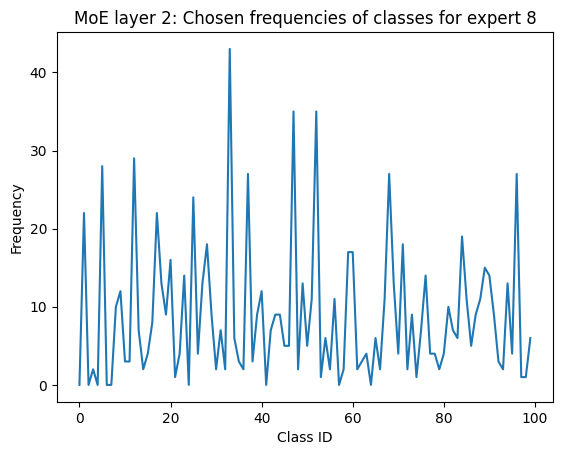

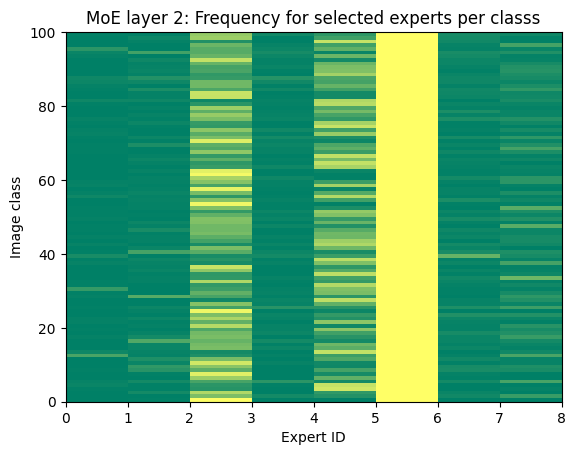

(2, 8, 100)


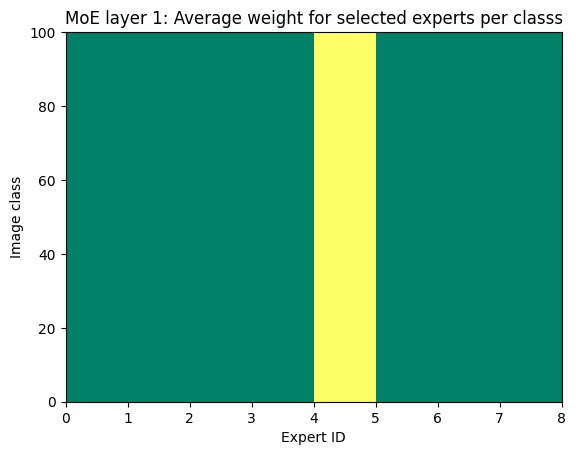

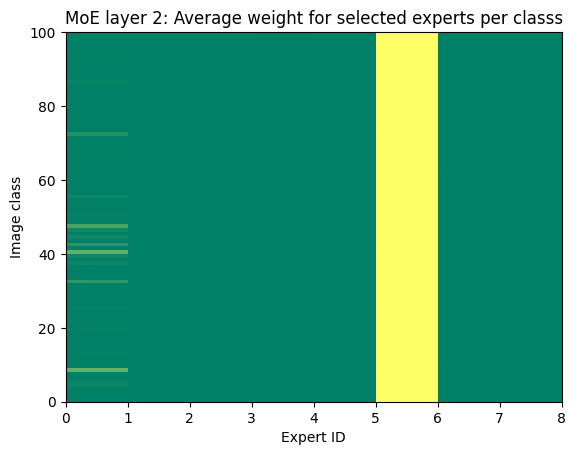

In [7]:
# No. 3
all_freq_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet20MoE/0923_124511/all_freq_from_experts_to_classes_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, freq_from_experts_to_classes in enumerate(all_freq_from_experts_to_classes):
    num_expert = freq_from_experts_to_classes.shape[0]
    classes_id = np.arange(100)
    for expert_id, freq_from_expert_to_classes in enumerate(freq_from_experts_to_classes):
        description = f'MoE layer {idx+1}: Chosen frequencies of classes for expert {expert_id+1}'
        plt.plot(classes_id, freq_from_expert_to_classes)
        plt.xlabel('Class ID')
        plt.ylabel('Frequency')
        plt.title(description)
        plt.show()
    description = f'MoE layer {idx+1}: Frequency for selected experts per classs'
    plt.pcolormesh(freq_from_experts_to_classes.T, cmap='summer')
    plt.xlabel('Expert ID')
    plt.ylabel('Image class')
    plt.title(description)
    plt.show()

all_avg_weight_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet20MoE/0923_124511/all_avg_weight_from_experts_to_classes_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, avg_weight_from_experts_to_classes in enumerate(all_avg_weight_from_experts_to_classes):
    num_expert = avg_weight_from_experts_to_classes.shape[0]
    num_classes = avg_weight_from_experts_to_classes.shape[1]
    expert_id_list = np.zeros(num_expert * num_classes)
    description = f'MoE layer {idx+1}: Average weight for selected experts per classs'
    plt.pcolormesh(avg_weight_from_experts_to_classes.T, cmap='summer')
    plt.xlabel('Expert ID')
    plt.ylabel('Image class')
    plt.title(description)
    plt.show()

# No.1

## Settings

* Time 2022-09-10
* 4 experts
* top 2 selected

## Observation 

* 在两个使用了MoE的nn.Conv中(CustomizedMoEBasicBlock的第二个nn.Conv Module)，可以观察到
    * 总有一个expert会所有的class选中（也就是frequency为100，即一个class里的所有的examples)
        * Why?
    * 其中有两个expert表现出了一种反对称互补的特点。比如Layer 1的Expert 0和2。这样的expert或许有一定的diversity。
    * 有一个expert不怎么活跃。例如Layer 0的Expert 2和Layer 1的Expert 3。
        * Why?
 
# No.2

## Settings

* Time 2022-09-17
* 4 experts
* top 2 selected

## Observations
* The gates are quite biased towards one experts.

# No.3

## Settings
* Imbalance_CIFAR100_LT_ResNet20MoE/0923_124511/
* 	    "num_expert": 8,
        "moe_top_k": 2,
        "num_classes": 100,
        "layer_moe_idx": [0, 0, 1, 0],
        "basic_block_moe_idx": [0, 1, 1],
        "reduce_dimension": false,
        "use_norm": false
* accuracy
    * overall **39.98%** (The best result of all three runs)
    * head 67.89%
    * middle 42.15%
    * tail 10.79%

## Observations

### From frequency
* Layer 1
    * Experts 2 and 5 nearly take all the examples to compute
    * Experts 6 and 7 are merely selected.
    * Other experts are selected few.

* Layer 2
    * Expert 6 is almost selected for all examples.
    * Expert 3 is a complement to expert 5 according to heat map.

### From average weight
* Layer 1
    * Most of the weights are assigned to expert 5.

* Layer 2
    * Most of the weights are assigned to expert 6. Expert 1 has some weights.(But expert 1 is not the second most selected experts. Maybe this expert has huge weights when selected.)